<a href="https://colab.research.google.com/github/STEVEYEONG/CryptoPricePredict/blob/main/DataGet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --no-cache-dir git+https://github.com/rongardF/tvdatafeed.git
!pip install mplfinance


  Cloning https://github.com/rongardF/tvdatafeed.git to /tmp/pip-req-build-amaoparm
  Running command git clone --filter=blob:none --quiet https://github.com/rongardF/tvdatafeed.git /tmp/pip-req-build-amaoparm
  Resolved https://github.com/rongardF/tvdatafeed.git to commit e6f6aaa7de439ac6e454d9b26d2760ded8dc4923
  Preparing metadata (setup.py) ... done
  Created wheel for tvdatafeed: filename=tvdatafeed-2.1.0-py3-none-any.whl size=17532 sha256=799f2c35f40364acc2514b28682f6d2354fd2ec88b76631d2f9f90d2d30046ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-3a22v7az/wheels/4b/f9/e9/82474a5d9a64702ba7dd5481dee05d267c69bcfa480d382b7c
Successfully built tvdatafeed
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
from tvDatafeed import TvDatafeed, Interval, TvDatafeedLive

# username = 'steveyy2001'
# password = 'Sy@@'

tv = TvDatafeed()

# index
index_data = tv.get_hist(symbol='BTCUSD',exchange='Binance',interval=Interval.in_daily,n_bars=10000)

# Export to CSV
index_data.to_csv('/content/FYP_Data/btcusdbinanced1.csv')


OSError: Cannot save file into a non-existent directory: '/content/FYP_Data'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load data (assuming it's already done)
file_path = '/content/drive/MyDrive/DataSet/btcusdbinanced1.csv'
data = pd.read_csv(file_path)

# Ensure the datetime column is in datetime format
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)  # Set the datetime as the index


In [ ]:
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2021-12-04 to 2024-08-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  1000 non-null   object 
 1   open    1000 non-null   float64
 2   high    1000 non-null   float64
 3   low     1000 non-null   float64
 4   close   1000 non-null   float64
 5   volume  1000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 54.7+ KB
None
               open          high           low         close        volume
count   1000.000000   1000.000000   1000.000000   1000.000000  1.000000e+03
mean   36756.788140  37508.257140  35953.633800  36760.774940  3.717244e+04
std    15984.335848  16323.407952  15587.056543  15990.154644  1.932293e+05
min    15762.870000  16282.440000  15479.250000  15755.850000  6.072490e+00
25%    23620.717500  24239.802500  23212.285000  23618.005000  3.459537e+02
50%    30387.335000  30781.720000  29842.815000  30389.045000  9.7

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


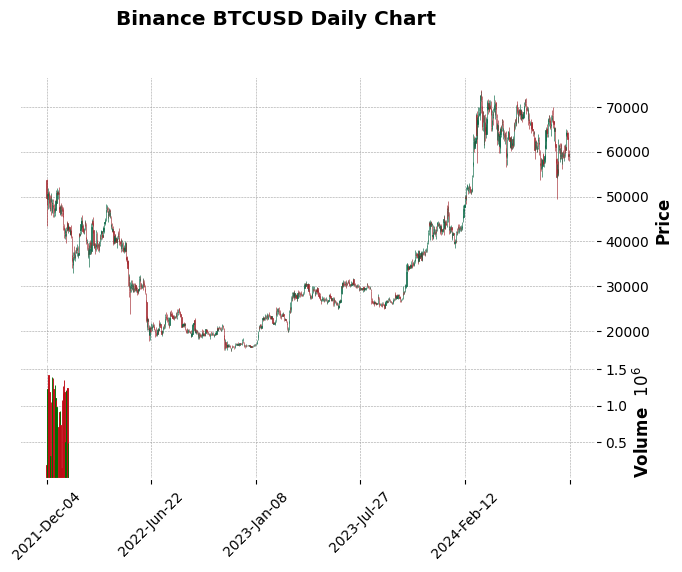

In [ ]:
import mplfinance as mpf

# Plot the candlestick chart with volume
mpf.plot(data, type='candle', volume=True, title='Binance BTCUSD Daily Chart', style='charles')


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


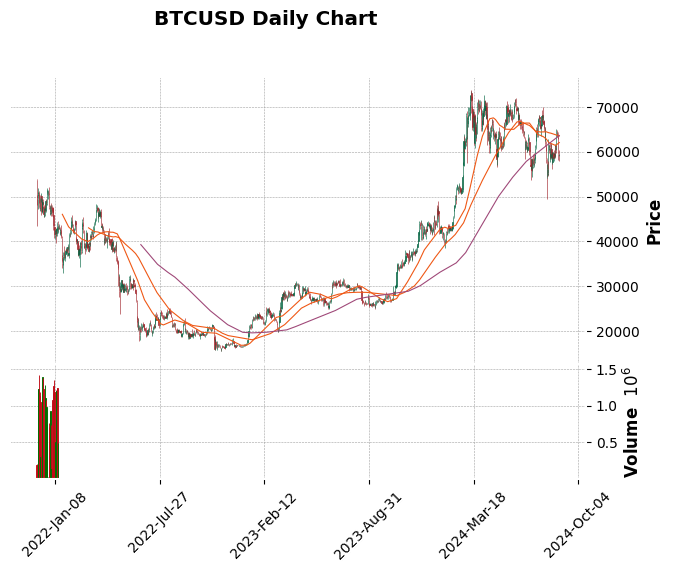

In [ ]:
mpf.plot(
    data,
    type='candle',
    volume=True,
    title='BTCUSD Daily Chart',
    style='charles',
    mav=(50, 100, 200),  # Moving averages for 5, 10, and 20 days
    show_nontrading=True
)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data (assuming it's already done)
file_path = '/content/drive/MyDrive/DataSet/btcusdbinanced1.csv'
data = pd.read_csv(file_path)

# Ensure the datetime column is in datetime format
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)  # Set the datetime as the index

# Check available columns and correct the column name if necessary
print(data.columns)  # Print the column names to verify

# Scale the data using the correct column name (adjust if needed)
scaler = MinMaxScaler(feature_range=(0, 1))
# Replace 'Close' with the actual name of the closing price column if it's different
scaled_data = scaler.fit_transform(data[['close']])

Index(['symbol', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [ ]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Preparing the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Using the last 60 days to predict the next day
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predicting the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
24/24 [==============================] - 5s 52ms/step - loss: 0.0193
Epoch 2/25
24/24 [==============================] - 1s 53ms/step - loss: 0.0028
Epoch 3/25
24/24 [==============================] - 1s 52ms/step - loss: 0.0023
Epoch 4/25
24/24 [==============================] - 1s 54ms/step - loss: 0.0022
Epoch 5/25
24/24 [==============================] - 1s 55ms/step - loss: 0.0019
Epoch 6/25
24/24 [==============================] - 2s 86ms/step - loss: 0.0019
Epoch 7/25
24/24 [==============================] - 2s 86ms/step - loss: 0.0017
Epoch 8/25
24/24 [==============================] - 2s 73ms/step - loss: 0.0017
Epoch 9/25
24/24 [==============================] - 1s 54ms/step - loss: 0.0016
Epoch 10/25
24/24 [==============================] - 1s 55ms/step - loss: 0.0016
Epoch 11/25
24/24 [==============================] - 1s 55ms/step - loss: 0.0015
Epoch 12/25
24/24 [==============================] - 1s 53ms/step - loss: 0.0014
Epoch 13/25
24/24 [==================

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling

# Calculating RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('RMSE:', rmse)


5/5 [==============================] - 2s 101ms/step
RMSE: 62596.33718015407


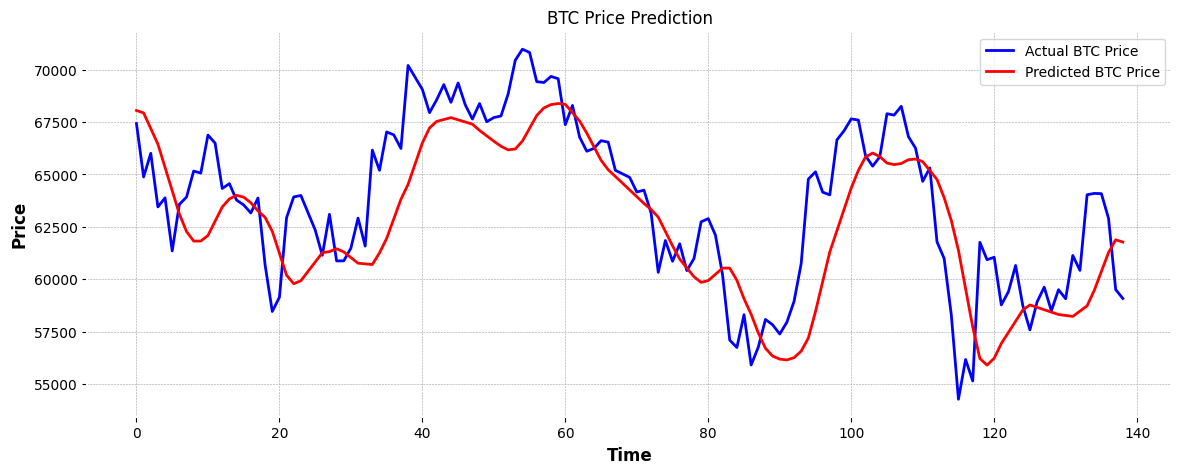

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(14,5))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual BTC Price')
plt.plot(predictions, color='red', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Calculate Moving Averages
data['MA50'] = data['close'].rolling(window=50).mean()
data['MA200'] = data['close'].rolling(window=200).mean()

# RSI Calculation (14 days)
delta = data['close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Drop NaN values created by rolling windows
data = data.dropna()

# Scale the data
features = ['close', 'MA50', 'MA200', 'RSI']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features])


In [ ]:
time_step = 100  # Increase the time step to capture longer trends
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [ ]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

# Assuming 'close' is the target variable and the only feature
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # Now X_train has the correct shape
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
22/22 [==============================] - 33s 511ms/step - loss: 0.0101
Epoch 2/50
22/22 [==============================] - 14s 644ms/step - loss: 0.0022
Epoch 3/50
22/22 [==============================] - 12s 544ms/step - loss: 0.0018
Epoch 4/50
22/22 [==============================] - 13s 599ms/step - loss: 0.0018
Epoch 5/50
22/22 [==============================] - 11s 499ms/step - loss: 0.0016
Epoch 6/50
22/22 [==============================] - 14s 649ms/step - loss: 0.0016
Epoch 7/50
22/22 [==============================] - 10s 447ms/step - loss: 0.0015
Epoch 8/50
22/22 [==============================] - 18s 839ms/step - loss: 0.0014
Epoch 9/50
22/22 [==============================] - 13s 597ms/step - loss: 0.0014
Epoch 10/50
22/22 [==============================] - 12s 550ms/step - loss: 0.0013
Epoch 11/50
22/22 [==============================] - 13s 583ms/step - loss: 0.0013
Epoch 12/50
22/22 [==============================] - 12s 551ms/step - loss: 0.0011
Epoch 13/50
2

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 273ms/step - loss: 0.0010 - val_loss: 8.8329e-04
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - loss: 0.0011 - val_loss: 8.3148e-04
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 261ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 288ms/step - loss: 8.8051e-04 - val_loss: 9.8480e-04
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step - loss: 9.5087e-04 - val_loss: 0.0011
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 225ms/step - loss: 0.0010 - val_loss: 8.6456e-04
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - loss: 9.4013e-04 - val_loss: 7.3083e-04
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 274ms/step - loss: 7.7430e-04 - val_loss: 8.5241e-04
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step - loss: 9.4816e-04 - val_loss: 7.5753e-04
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 255ms/step - loss: 9.9053e-

Predictions shape: (237,)
Actual prices shape: (237,)
First few predicted prices: [4.61495033e+28 4.63242336e+28 4.62368424e+28 4.61608355e+28
 4.83691504e+28]
First few actual prices: [46509.66586652 46381.35934047 46317.27985922 49050.4062305
 48288.7476297 ]


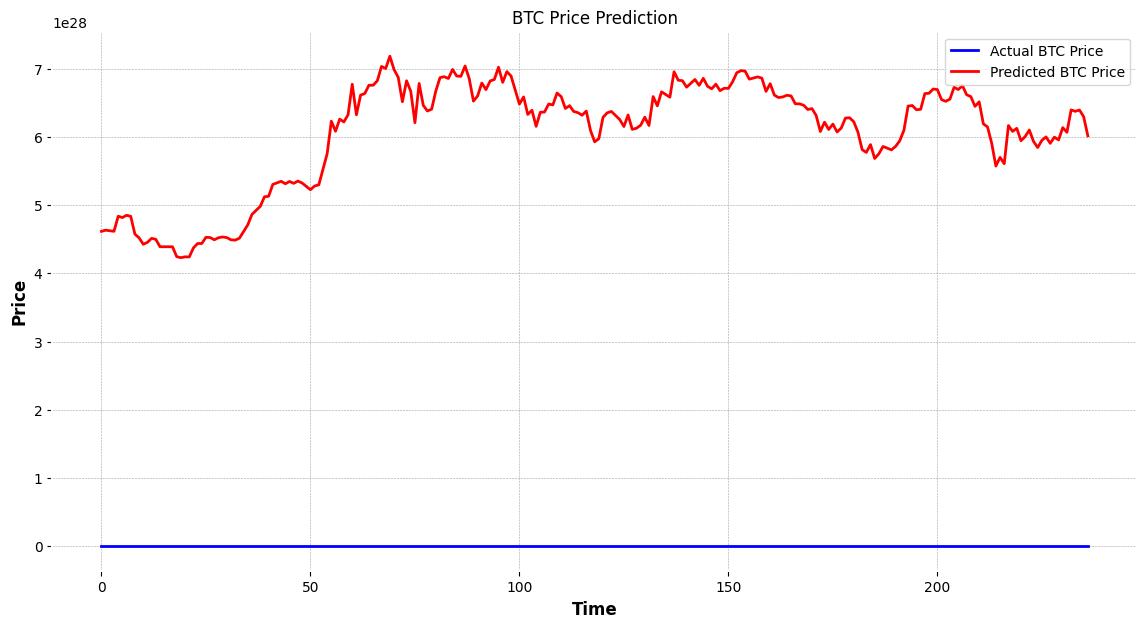

In [ ]:
# Reshape predictions to have the same number of features as the original data
predictions = predictions.reshape(-1, 1)  # Reshape to (n_samples, 1)

# Create a dummy array with the required number of features (3 dummy features to match original data)
dummy_data = np.zeros((predictions.shape[0], 3))

# Concatenate predictions with the dummy array
predictions_with_dummy = np.concatenate((predictions, dummy_data), axis=1)

# Now inverse transform the concatenated array
predictions = scaler.inverse_transform(predictions_with_dummy)

# Extract the actual predictions (first column)
predictions = predictions[:, 0]

# Prepare y_test for inverse transformation
other_features_test = np.zeros((y_test.shape[0], 3))  # Same dummy features for y_test

# Combine y_test (as 'close') with the placeholder features
y_test_with_features = np.concatenate((y_test.reshape(-1, 1), other_features_test), axis=1)

# Calculate actual prices in original scale
actual_prices = scaler.inverse_transform(y_test_with_features)
actual_prices = actual_prices[:, 0]

# Debug: Print shapes and first few values to ensure correctness
print("Predictions shape:", predictions.shape)
print("Actual prices shape:", actual_prices.shape)
print("First few predicted prices:", predictions[:5])
print("First few actual prices:", actual_prices[:5])

# Plot the actual vs predicted prices
plt.figure(figsize=(14,7))
plt.plot(actual_prices, color='blue', label='Actual BTC Price')
plt.plot(predictions, color='red', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

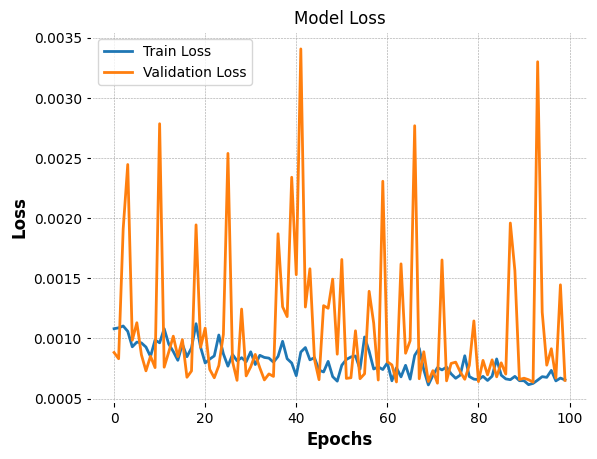

Mean Squared Error: 3.730522150068452e+57
Mean Absolute Error: 6.056198231094603e+28


In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_prices, predictions)
mae = mean_absolute_error(actual_prices, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


In [ ]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [ ]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
data['lag1'] = data['close'].shift(1)
data['lag2'] = data['close'].shift(2)


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Assuming 'data' is your DataFrame containing features and target
# Replace 'feature_columns' with the actual names of your feature columns
feature_columns = ['open', 'high', 'low', 'lag1', 'lag2']
X = data[feature_columns].values  # Extract features into a NumPy array
y = data['close'].values  # Extract target variable

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


# Feature Engineering (Lagged Features)
data['lag1'] = data['close'].shift(1)
data['lag2'] = data['close'].shift(2)
data = data.dropna()  # Remove rows with NaN values introduced by lagging

# Define feature columns and target variable
feature_columns = ['open', 'high', 'low', 'lag1', 'lag2']
X = data[feature_columns].values
y = data['close'].values

# Time Series Split for Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scale the input features
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the LSTM model architecture
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))

    # Compile the model with gradient clipping
    optimizer = Adam(learning_rate=0.001, clipvalue=1.0)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Fit the model with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=100, batch_size=32,
              validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Evaluate the model (add your evaluation metrics here)
    # ...

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 1084344704.0000 - val_loss: 2405357824.0000
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1025735552.0000 - val_loss: 2405162240.0000
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1003069632.0000 - val_loss: 2404595456.0000
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 996870080.0000 - val_loss: 2404079872.0000
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1121262848.0000 - val_loss: 2403899392.0000
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 992299200.0000 - val_loss: 2403808256.0000
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 963286336.0000 - val_loss: 2403728384.0000
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1076840576.0000 - val_loss: 2403649792.0000
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1052118528.0000 - val_loss: 2403572224.0000
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 970963520.0000 - val_loss:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 1716232320.0000 - val_loss: 1315910912.0000
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1671435776.0000 - val_loss: 1315126272.0000
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1679000448.0000 - val_loss: 1314845824.0000
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1676587520.0000 - val_loss: 1314728576.0000
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1670382336.0000 - val_loss: 1314614784.0000
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1722225664.0000 - val_loss: 1314501376.0000
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1721957504.0000 - val_loss: 1314388224.0000
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1688940544.0000 - val_loss: 1314274688.0000
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1767934080.0000 - val_loss: 1314161536.0000
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1776751488.0000

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 1541876480.0000 - val_loss: 461960096.0000
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1580521856.0000 - val_loss: 461480000.0000
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1515711104.0000 - val_loss: 461372992.0000
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1537869056.0000 - val_loss: 461270208.0000
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1592976384.0000 - val_loss: 461167648.0000
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1639586560.0000 - val_loss: 461065248.0000
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1641330688.0000 - val_loss: 460962784.0000
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1591688064.0000 - val_loss: 460860448.0000
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1605830784.0000 - val_loss: 460757984.0000
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1584105216.0000 - val_lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 1270328960.0000 - val_loss: 972677248.0000
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1293283328.0000 - val_loss: 972295808.0000
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1266837888.0000 - val_loss: 972097408.0000
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1334861056.0000 - val_loss: 971899456.0000
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1223861504.0000 - val_loss: 971701056.0000
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1243632768.0000 - val_loss: 971503040.0000
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1296190848.0000 - val_loss: 971305280.0000
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1341972096.0000 - val_loss: 971107840.0000
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1286556800.0000 - val_loss: 970910016.0000
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1255856896.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 1254625920.0000 - val_loss: 3646780160.0000
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1237904768.0000 - val_loss: 3646288640.0000
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1241755008.0000 - val_loss: 3645815296.0000
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1218907136.0000 - val_loss: 3645345024.0000
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1209831040.0000 - val_loss: 3644875520.0000
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1258994176.0000 - val_loss: 3644405760.0000
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1217293568.0000 - val_loss: 3643934976.0000
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1240410880.0000 - val_loss: 3643465984.0000
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1263916928.0000 - val_loss: 3642995712.0000
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1225410688.0000

In [ ]:

# Predict the test set results
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

# Plot the actual vs predicted prices
plt.figure(figsize=(14,7))
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_pred, color='red', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'model' is not defined